In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset

loan=pd.read_csv('fraud_loan_detection.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#Checking the shape of columns
loan.shape

(614, 13)

In [4]:
#Checking the columns
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Checking the datatype of columns
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observation:


    1-The dataset contains only two type of data type numeric and object.

    2-In numeric data it consist of int and float.

In [6]:
#Checking the information of dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Observation:

    Numeric features
    numeric_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

    Categorical features:
    categorical_features =['Loan_ID','Gender','Married', 'Dependents', 'Education', 'Self_Employed','Property_Area',
                            'Loan_Status']

## To check the missing values

In [7]:
#Checking for any missing value present in our dataset
loan.isnull().values.any()

True

In [8]:
#Checking the missing value column wise
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

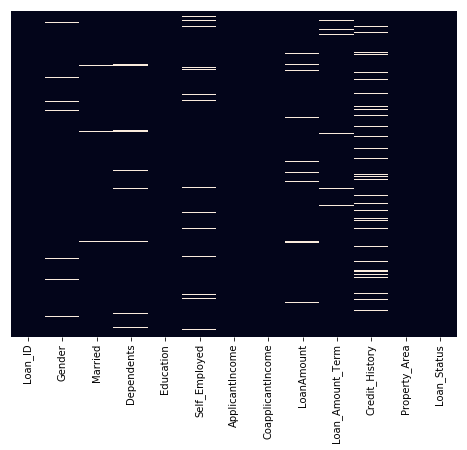

In [9]:
#Seeing the missing value via visualization
plt.figure(figsize=(8,6))
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

Observation:

    1-The summary shows that the variables - Gender,Married,Dependents,Self_Employed contain missing values. These variables         are categorical data type. So I will impute the missing values with the most frequent value i.e. mode.
        
    2-Also the variables - LoanAmount,Loan_Amount_Term,Credit_History contains missing values. These variables are numeric 
      data type. So I will impute the missing values with the mean.   

### Imputing values in Categorical columns

In [10]:
#Imputing the missing value with mode 

for col in ['Gender', 'Married', 'Dependents','Self_Employed']:
    loan[col].fillna(loan[col].mode()[0], inplace=True)

In [11]:
#Now Check the null values.
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation:
    
    Now all the missing values present in categorical columns are imputed.

### Imputing values in Numeric cloumns.

In [12]:
#Imputing the missing value with their mean

loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(),inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mean(),inplace=True)

In [13]:
#Now Check the null values.
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observation:
    
    Now all the missing values are imputed. We caan also see this with heatmap.

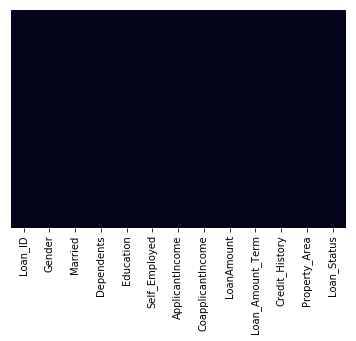

In [14]:
#With the help of Heatmap again checking the missing value.
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [15]:
#Checking for any missing values present in the dataset.
loan.isnull().values.any()

False

Now All the missing values are removed.

## Exploring the Categorical columns.

In [16]:
#Printingb the object datatypes and their unique values.

for column in loan.columns:
    if loan[column].dtypes == object:
        print(str(column) + ' : ' + str(loan[column].unique()))
        print(loan[column].value_counts())
        print('*********************************************************************************************************')
        print('\n')

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

Observation:
    
    This is the summary of categorical columns.
    
    1-Loan sanction to 422 people.
    
    2-Three types of Property area are mention in our dataset i.e. Urban,Rural, and Semiurban.
    
    3-532 people are self employed.
    
    4- Out of 614 people only 480 people are Graduated.
    
    5- Out of 614 people 401 people are married.

### For Analyzing the data with target i.e. Loan_Status we have to change income into numeric type.

In [17]:
#Changing the data type of target variable.

loan['Loan_Status'] = loan['Loan_Status'].map({'N' : 0, 'Y' : 1})
loan['Loan_Status'].dtypes

dtype('int64')

In [18]:
loan['Loan_Status'].unique()

array([1, 0], dtype=int64)

Observation:
    
    Here 1 stands for loan sanction and 0 stands for loan rejected. 

# Summary Statistics

In [19]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Observation:
    
    1-Applicant maximum income is 81000 and minimum income is 150.
    
    2-Coapplicant maximum income is 41667 and minimum income is zero.
    
    3-Maximum Loan Amount is 700 and minimum is 9.
    
    4-For Applicant Income, CoapplicantIncome, Loan Amount mean is greater tah median therefore data is right skewed for 
    
    these attributes.
      
    5-For Loan_Amount_Term, Credit_History, Loan_Status median is greater than mean therefore data is left skewed for these 
       
       attributes.
       
    6-The difference between 75% and maximum is higher in Applicant Income, CoapplicantIncome, Loan Amount, Loan Amount Term
      
      columns therefore outliers are present in these columns.

# To check the correlation

In [20]:
loan_cor= loan.corr()
loan_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

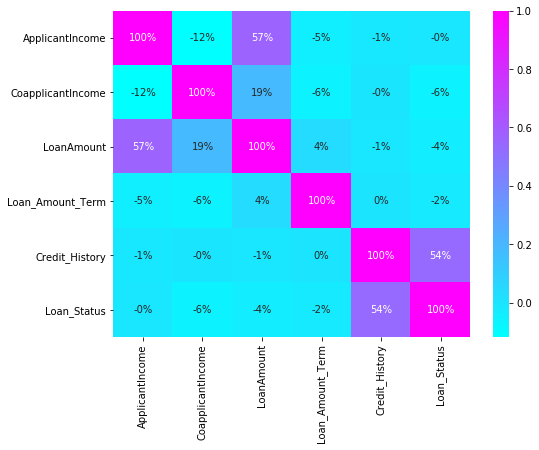

In [21]:
#Correlation via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(loan_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Text(0.5,1,'Correlation with target Variable')

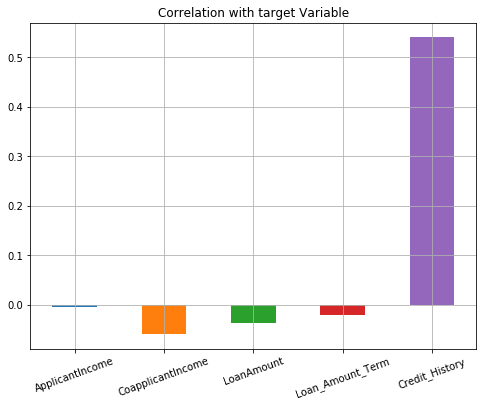

In [22]:
#Checking the correlation with target variable
plt.figure(figsize=(8,6))
loan.drop('Loan_Status', axis=1).corrwith(loan['Loan_Status']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target Variable")

Observation:
    
    1-Loan Status is highly correlated with Credit_History.
    
    2-Loan Amount term is highly correlated with Applicant Income.

# Data Visualization

Our feature variable of interest is Loan_Status.

It refers to the loan sanction.

We already change it integer valued as it contains only two number 0 and 1.

1 stands for Loan sanction.

0 stands for Loan not pass.

## Univariate Analysis

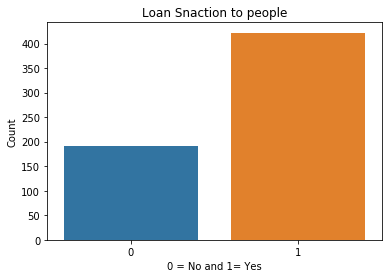

1    422
0    192
Name: Loan_Status, dtype: int64


In [23]:
#Checking Loan Sanction.
plt.subplots(figsize=(6,4))
sns.countplot(x="Loan_Status", data=loan)
plt.title("Loan Snaction to people")
plt.xlabel('0 = No and 1= Yes')
plt.ylabel("Count")
plt.show()

print(loan.Loan_Status.value_counts())

Observation:

    1-422 people get loan.

    2-192 people did not get loan..

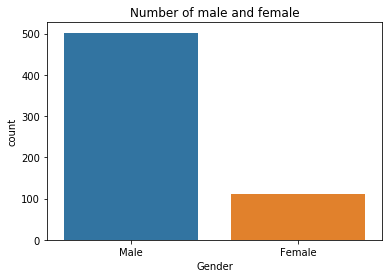

Male      502
Female    112
Name: Gender, dtype: int64


In [24]:
#Checking Gender.
plt.subplots(figsize=(6,4))
sns.countplot(x="Gender", data=loan)
plt.title("Number of male and female")
plt.show()

print(loan.Gender.value_counts())

Observation:

     There are 502 male and 112 Female.

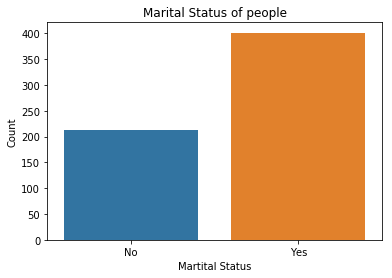

Yes    401
No     213
Name: Married, dtype: int64


In [25]:
#Checking Marital Status.
plt.subplots(figsize=(6,4))
sns.countplot(x="Married", data=loan)
plt.title("Marital Status of people")
plt.xlabel('Martital Status')
plt.ylabel("Count")
plt.show()

print(loan.Married.value_counts())

Observation:
    
    401 people are married out of 614 people.

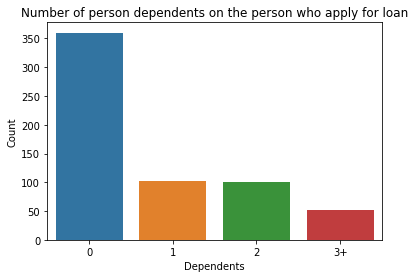

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [26]:
#Checking number of person dependents on the person who apply for loan .
plt.subplots(figsize=(6,4))
sns.countplot(x="Dependents", data=loan)
plt.title("Number of person dependents on the person who apply for loan")
plt.xlabel('Dependents')
plt.ylabel("Count")
plt.show()

print(loan.Dependents.value_counts())

Observation:
    
    1-Out of 614 person , 360 person have no dependents.
    
    2- 51 person have 3+ dependents.

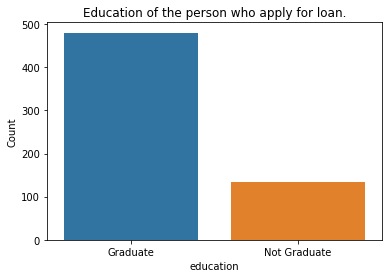

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [27]:
#Checking Education of the person who apply for loan.
plt.subplots(figsize=(6,4))
sns.countplot(x="Education", data=loan)
plt.title("Education of the person who apply for loan.")
plt.xlabel('education')
plt.ylabel("Count")
plt.show()

print(loan.Education.value_counts())

Observation:
    
     Out of 614 , 480 people have done Graduation.

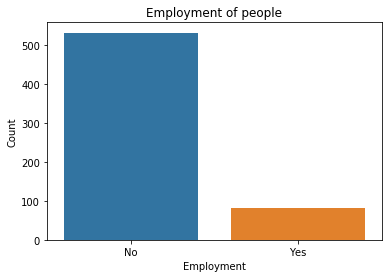

No     532
Yes     82
Name: Self_Employed, dtype: int64


In [28]:
#Checking Employment of the person who apply for loan.
plt.subplots(figsize=(6,4))
sns.countplot(x="Self_Employed", data=loan)
plt.title("Employment of people")
plt.xlabel('Employment')
plt.ylabel("Count")
plt.show()

print(loan.Self_Employed.value_counts())

Obervation:
    
    1-Only 82 person out of 614 are self employed.

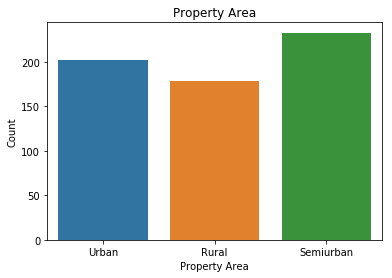

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [29]:
#Checking Property Area of the person who apply for loan.
plt.subplots(figsize=(6,4))
sns.countplot(x="Property_Area", data=loan)
plt.title("Property Area")
plt.xlabel('Property Area')
plt.ylabel("Count")
plt.show()

print(loan.Property_Area.value_counts())

Observation:
    
    233 have property area in Semiurban.
    
    202 have property in Urban area.
    
    179 have property in Rural area.

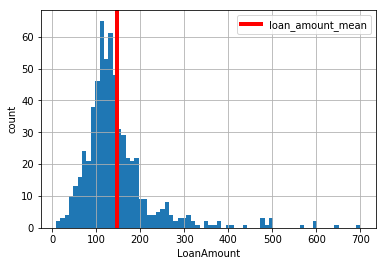

In [30]:
#Checking the mean of Loan_Amount

loan_amount = loan['LoanAmount'].hist(bins=70)
mean_val = np.mean(loan['LoanAmount'])
plt.axvline(mean_val,linewidth=4,  color='red', label='loan_amount_mean')
plt.xlabel('LoanAmount')
plt.ylabel('count')
plt.legend()
plt.show()

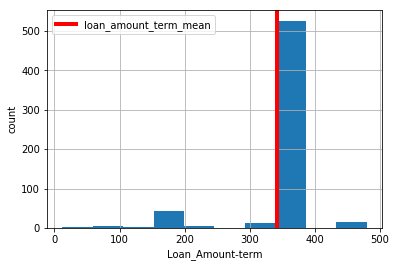

In [31]:
#Checking the mean of Loan_Amount_Term

loan_amount = loan['Loan_Amount_Term'].hist()
mean_val = np.mean(loan['Loan_Amount_Term'])
plt.axvline(mean_val,linewidth=4,  color='red', label='loan_amount_term_mean')
plt.xlabel('Loan_Amount-term')
plt.ylabel('count')
plt.legend()
plt.show()

## Bivariate Analysis

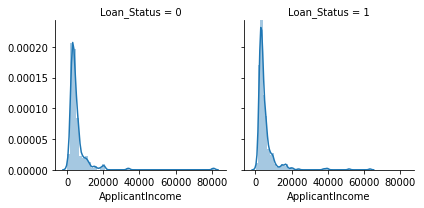

In [32]:
# Exploring Applicant Income vs Loan_Status via FaceGrid
facet = sns.FacetGrid(loan, col='Loan_Status')
facet.map(sns.distplot, "ApplicantIncome")
plt.show()

### Gender vs Loan Status

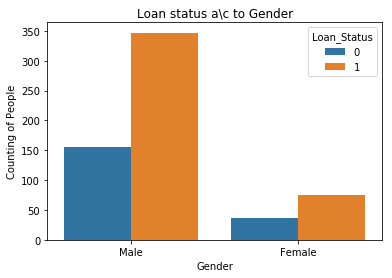

Gender  Loan_Status
Female  1               75
        0               37
Male    1              347
        0              155
Name: Loan_Status, dtype: int64


In [33]:
#Gender vs Loan status
sns.countplot(x="Gender",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to Gender")
plt.xlabel('Gender')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Gender')['Loan_Status'].value_counts())

Observation:
    
    1-75 female get laon
    
    2- 347 male get loan

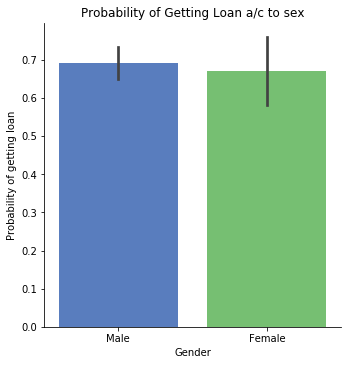

In [34]:
#Factor plot of Gender vs Loan Status
sns.factorplot(x="Gender",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to sex')
plt.ylabel("Probability of getting loan")
plt.show()

### Education vs Loan Status

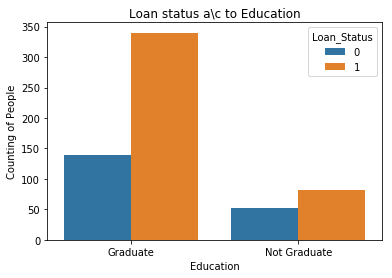

Education     Loan_Status
Graduate      1              340
              0              140
Not Graduate  1               82
              0               52
Name: Loan_Status, dtype: int64


In [35]:
#Eduaction vs Loan status
sns.countplot(x="Education",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to Education")
plt.xlabel('Education')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Education')['Loan_Status'].value_counts())

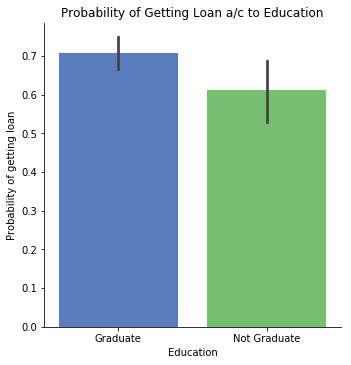

In [36]:
#Factor plot of Education vs Loan Status
sns.factorplot(x="Education",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to Education')
plt.ylabel("Probability of getting loan")
plt.show()

### Marital Status vs Loan Status

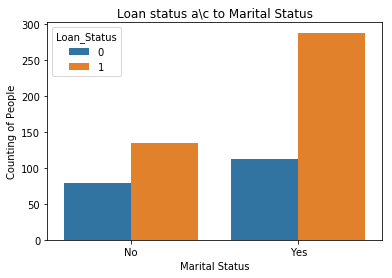

Married  Loan_Status
No       1              134
         0               79
Yes      1              288
         0              113
Name: Loan_Status, dtype: int64


In [37]:
#Eduaction vs Loan status
sns.countplot(x="Married",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Married')['Loan_Status'].value_counts())

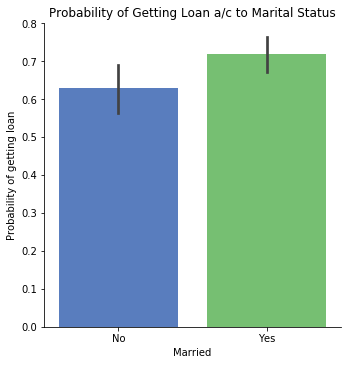

In [38]:
#Factor plot of Marital status vs Loan Status
sns.factorplot(x="Married",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to Marital Status')
plt.ylabel("Probability of getting loan")
plt.show()

### Dependent vs Loan Status

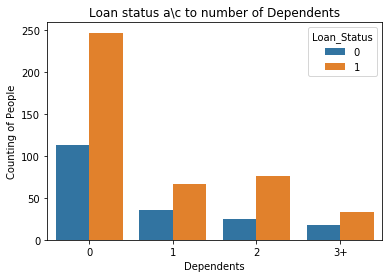

Dependents  Loan_Status
0           1              247
            0              113
1           1               66
            0               36
2           1               76
            0               25
3+          1               33
            0               18
Name: Loan_Status, dtype: int64


In [39]:
#Dependents vs Loan status
sns.countplot(x="Dependents",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to number of Dependents")
plt.xlabel('Dependents')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Dependents')['Loan_Status'].value_counts())

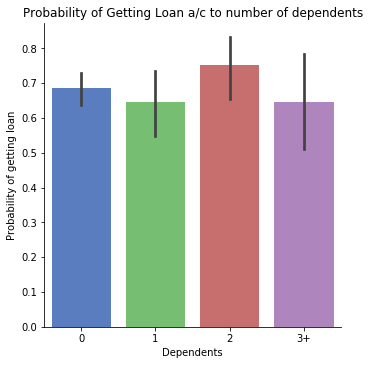

In [40]:
#Factor plot of Dependents vs Loan Status
sns.factorplot(x="Dependents",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to number of dependents')
plt.ylabel("Probability of getting loan")
plt.show()

### Employment vs Loan Status

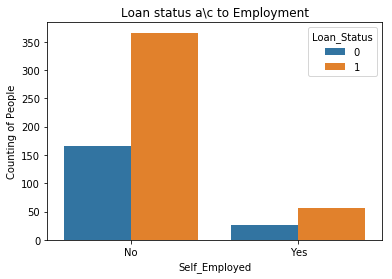

Self_Employed  Loan_Status
No             1              366
               0              166
Yes            1               56
               0               26
Name: Loan_Status, dtype: int64


In [41]:
#Employment vs Loan status
sns.countplot(x="Self_Employed",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to Employment")
plt.xlabel('Self_Employed')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Self_Employed')['Loan_Status'].value_counts())

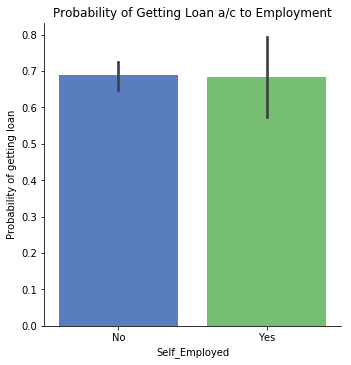

In [42]:
#Factor plot of Self Employed vs Loan Status
sns.factorplot(x="Self_Employed",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to Employment')
plt.ylabel("Probability of getting loan")
plt.show()

### Property Area vs Loan Status

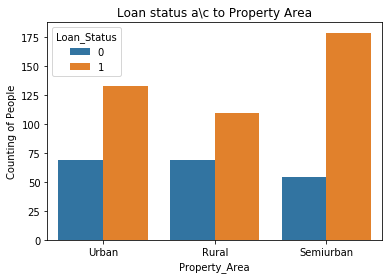

Property_Area  Loan_Status
Rural          1              110
               0               69
Semiurban      1              179
               0               54
Urban          1              133
               0               69
Name: Loan_Status, dtype: int64


In [43]:
#Property Area vs Loan status
sns.countplot(x="Property_Area",hue='Loan_Status',data=loan)
plt.title("Loan status a\c to Property Area")
plt.xlabel('Property_Area')
plt.ylabel('Counting of People')
plt.show()


print(loan.groupby('Property_Area')['Loan_Status'].value_counts())

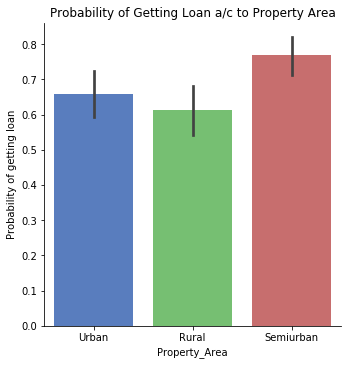

In [44]:
#Factor plot of Property Area vs Loan Status
sns.factorplot(x="Property_Area",y="Loan_Status",data=loan,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Getting Loan a/c to Property Area')
plt.ylabel("Probability of getting loan")
plt.show()

<Figure size 576x288 with 0 Axes>

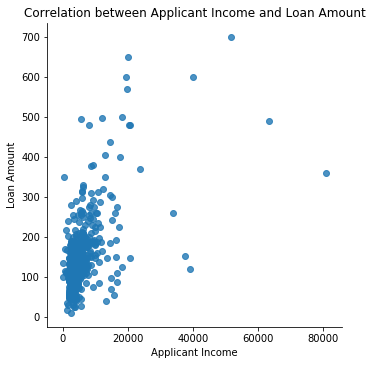

In [45]:
#Scatter plot between Applicant Income and Looan Amount.
plt.figure(figsize=(8,4))
sns.lmplot(x='ApplicantIncome',y='LoanAmount',fit_reg=False,data=loan)
plt.xlabel('Applicant Income')
plt.title("Correlation between Applicant Income and Loan Amount")
plt.ylabel("Loan Amount")
plt.show()

## Multivariate Analysis

<Figure size 576x288 with 0 Axes>

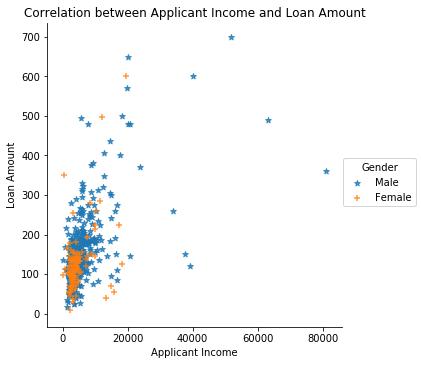

In [46]:
#Scatter plot between Applicant Income and Looan Amount.
plt.figure(figsize=(8,4))
sns.lmplot(x='ApplicantIncome',y='LoanAmount',fit_reg=False,data=loan,hue='Gender',markers=['*','+'])
plt.xlabel('Applicant Income')
plt.title("Correlation between Applicant Income and Loan Amount")
plt.ylabel("Loan Amount")
plt.show()

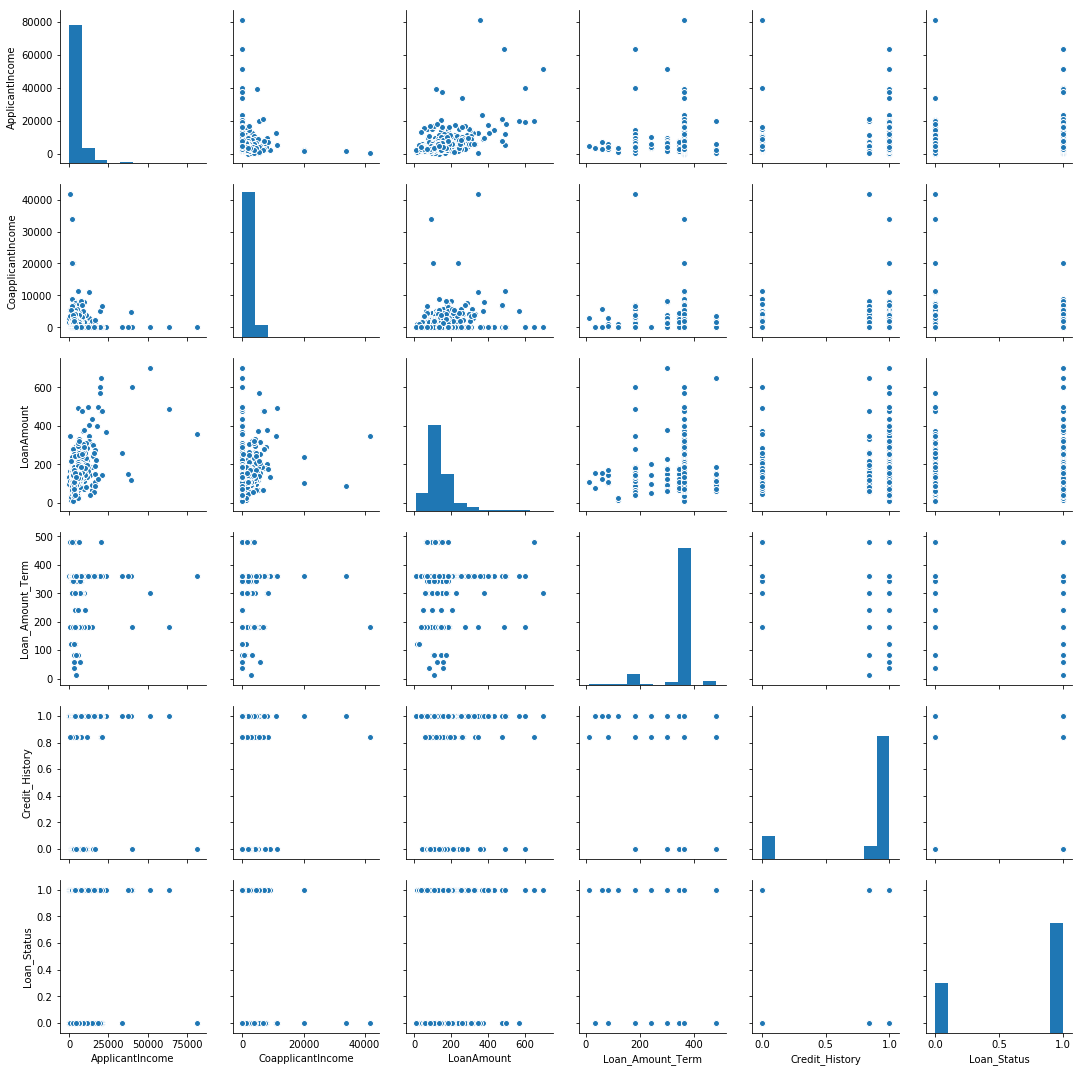

In [47]:
sns.pairplot(loan)

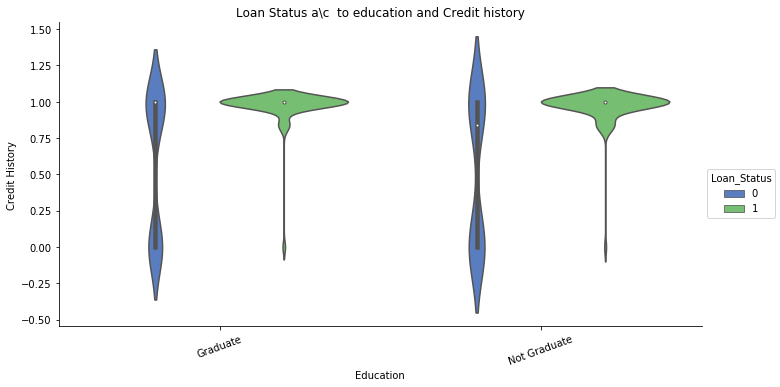

In [48]:
sns.factorplot(x="Education",y='Credit_History',hue="Loan_Status",data=loan,kind="violin",size = 5,palette = "muted",aspect=2)
plt.title('Loan Status a\c  to education and Credit history')
plt.xticks(rotation=20)
plt.ylabel("Credit History")
plt.show()

## Checking Skewness

### To check the distribution of Skewness

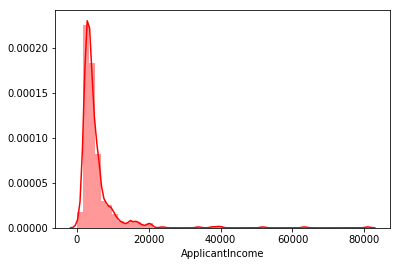

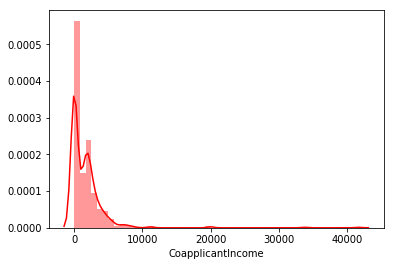

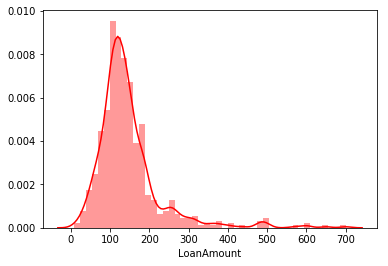

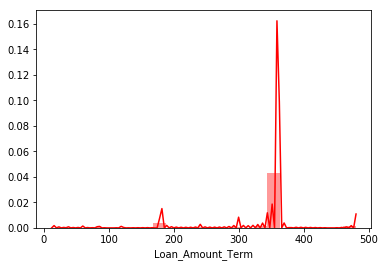

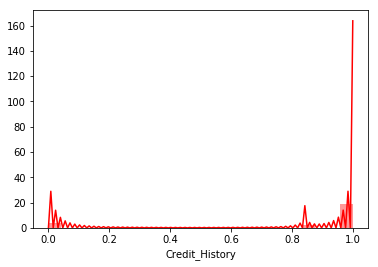

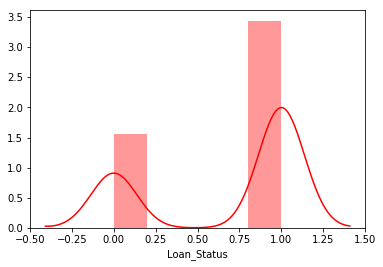

In [49]:
for col in loan.describe().columns:
    sns.distplot(loan[col],color='r')
    plt.show()

In [50]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [51]:
#Treating Skewness via square root method.
loan.skew()
for col in loan.skew().index:
    if col in loan.describe().columns:
        if loan[col].skew()>0.55:
            loan[col]=np.sqrt(loan[col])
        if loan[col].skew()<-0.55:
            loan[col]=np.cbrt(loan[col])

In [52]:
loan.skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Loan_Status         -0.809998
dtype: float64

## Changing the categorical variables into numeric variable

In [53]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in loan.columns:
    if loan[column].dtype==np.number:
        continue
    loan[column]=le.fit_transform(loan[column])

In [54]:
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2,1.0


## Plotting Outliers

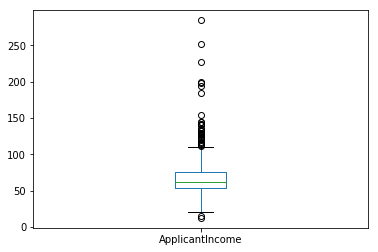

In [55]:
loan['ApplicantIncome'].plot.box()

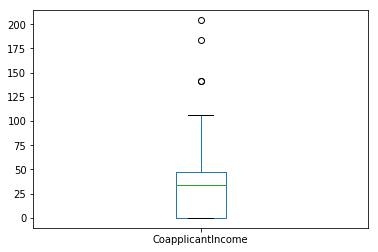

In [56]:
loan['CoapplicantIncome'].plot.box()

## Removing Outliers

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(loan))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42650477, 0.04760721,
        1.48253724]])

In [59]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 487,
       495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8, 8, 7,
       6, 7, 6, 8, 9, 9, 8, 8, 9, 8, 9, 7, 9, 7, 8], dtype=int64))


In [60]:
loan_new=loan[(z<3).all(axis=1)]

In [61]:
print(loan.shape,'\t\t',loan_new.shape)

(614, 13) 		 (580, 13)


In [62]:
loan=loan_new
loan.shape

(580, 13)

### All outliers are removed.

## Model Training

In [57]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,12.100089,7.113787,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,7.113787,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,7.113787,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,7.113787,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,7.113787,1.0,Urban,1.0


In [63]:
#Splitting the data into input and output variable.
x=loan.drop(columns=['Loan_Status'],axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2


In [64]:
y=loan['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [65]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(580, 12) 		 (580,)


In [66]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [67]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [68]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(464, 12) 		 (116, 12)


In [69]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(464,) 	 (116,)


In [70]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [71]:
# All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')


Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.8620689655172413
[[21 15]
 [ 1 79]]
             precision    recall  f1-score   support

        0.0       0.95      0.58      0.72        36
        1.0       0.84      0.99      0.91        80

avg / total       0.88      0.86      0.85       116

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.8620689655172413
[[21 15]
 [ 1 79]]
             precision    recall  f1-score   support

        0.0       0.95      0.58      0.72        36
        1.0       0.84      0.99      0.91        80

avg / total       0.88      0.86      0.85       116

*********************************************************************

In [72]:
#Cross Validate the models

models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.82051282 0.82051282 0.79487179 0.79487179 0.79487179 0.79487179
 0.74358974 0.79487179 0.82051282 0.84615385 0.89473684 0.84210526
 0.73684211 0.92105263 0.84210526]
Mean Score: 0.8174988753936122
Standard deviation: 0.04710016963936306
************************************************************************************************


Model: GaussianNB(priors=None)
Score: [0.82051282 0.82051282 0.79487179 0.79487179 0.79487179 0.79487179
 0.74358974 0.79487179 0.82051282 0.84615385 0.89473684 0.84210526
 0.71052632 0.92105263 0.84210526]
Mean Score: 0.8157444894286999
Standard deviation: 0.05044325894145981
************************************************************************************************


Model

From Above models Logistic Regression , SVC and GaussianNB gives best score.

we use grid search cv to find the best parameter and check the score and after that we finalized our model.

### Using GridSearchCV to find out the best parameter in LogisticRegression

In [73]:
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [74]:
#Logistic Regression with best parameters

lr=LogisticRegression(C=1,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8620689655172413
[[21 15]
 [ 1 79]]
             precision    recall  f1-score   support

        0.0       0.95      0.58      0.72        36
        1.0       0.84      0.99      0.91        80

avg / total       0.88      0.86      0.85       116



In [75]:
#Cross Validate Logistic Regression

score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.8362069 ]
Mean: 0.8172413793103448
Std: 0.02853956096077041


### Using GridSearchCV to find out the best parameter in SVM

In [76]:
from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(42,60)}
sv=SVC()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear', 'random_state': 42}


In [77]:
#SVM with parameters

sv=SVC(kernel='linear',C=1,random_state=42,probability=True)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8620689655172413
[[21 15]
 [ 1 79]]
             precision    recall  f1-score   support

        0.0       0.95      0.58      0.72        36
        1.0       0.84      0.99      0.91        80

avg / total       0.88      0.86      0.85       116



In [78]:
#Cross Validate SVC

score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.8362069 ]
Mean: 0.8172413793103448
Std: 0.02853956096077041


### GaussianNB

In [79]:
#GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8620689655172413
[[21 15]
 [ 1 79]]
             precision    recall  f1-score   support

        0.0       0.95      0.58      0.72        36
        1.0       0.84      0.99      0.91        80

avg / total       0.88      0.86      0.85       116



In [81]:
#Cross Validate GaussianNB

score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.81034483]
Mean: 0.8120689655172413
Std: 0.026931895434160864


### Among all three models GaussianNB gives highest score so we adopt Gaussian NB as our Final model.

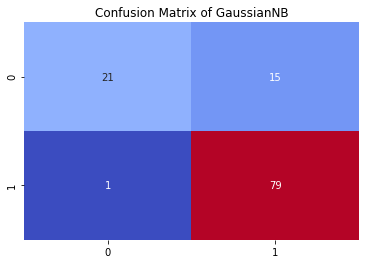

In [82]:
#Plotting Confusion Matrix for GaussianNB.
cm=confusion_matrix(y_test,predgnb)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of GaussianNB")
plt.show()

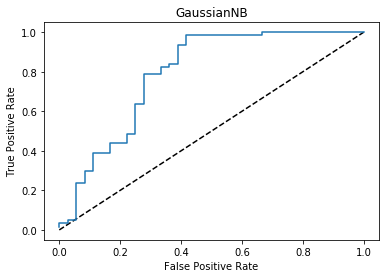

0.7854166666666667


In [83]:
#AUC_ROC Curve  and finding auc score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

auc_score=roc_auc_score(y_test,predgnb)
print(auc_score)                     

In [84]:
#Saving this GaussianNB model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(gnb,'Fraud_loan_gnb.pkl')

['Fraud_loan_gnb.pkl']